In [93]:
import pandas as pd
import sys
import tensorflow as tf
import re

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords #불용어 처리에 관한 것  #토큰화: 나눠서 학습시켜야 한다. nltk: 토큰화를 할 때 쓰는 것.주로 영어를 쓸 때.
from nltk.tokenize import RegexpTokenizer 
import nltk
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
!pip install konlpy

from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.tag import Mecab

Defaulting to user installation because normal site-packages is not writeable


In [94]:
df = pd.read_excel('마켓컬리리뷰_덕후선생.xlsx') 

In [95]:
df

,마켓컬리리뷰,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,플랫폼,작성자,리뷰날짜,상세제품명,리뷰내용
1,마켓컬리,일반,2023.01.29,[덕후선생] 쯔란갈비 465g,진짜 여지껏 먹어보지 못한 맛이에요!\n갈비가 진짜 살도 실하고 질기지 않고 \n부...
2,마켓컬리,조**,2023.02.06,[덕후선생] 쯔란갈비 465g,오 ~~ 매장에서 먹은맛이랑 비슷~ \n가끔 시켜먹고 싶은 맛 술안주~~^^
3,마켓컬리,권**,2023.02.06,[덕후선생] 쯔란갈비 465g,쯔란이 잘 어울려요
4,마켓컬리,박**,2023.02.06,[덕후선생] 쯔란갈비 465g,어머 맛있네요 어제 주문해서 오늘 먹고 오늘 또 주문했어요 ㅋㅋ
...,...,...,...,...,...
486,마켓컬리,유**,2023.01.27,[덕후선생] 마장반면 425g,"고추기름, 땅콩맛 잘 느껴져요\n진짜 맛있어요 ㅎㅎ \n컬리에서 여러개 한 번에 주..."
487,마켓컬리,NaN,NaN,NaN,NaN
488,마켓컬리,NaN,NaN,NaN,NaN
489,마켓컬리,NaN,NaN,NaN,NaN


In [96]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [97]:
df

,플랫폼,작성자,리뷰날짜,상세제품명,리뷰내용
0,마켓컬리,일반,2023.01.29,[덕후선생] 쯔란갈비 465g,진짜 여지껏 먹어보지 못한 맛이에요!\n갈비가 진짜 살도 실하고 질기지 않고 \n부...
1,마켓컬리,조**,2023.02.06,[덕후선생] 쯔란갈비 465g,오 ~~ 매장에서 먹은맛이랑 비슷~ \n가끔 시켜먹고 싶은 맛 술안주~~^^
2,마켓컬리,권**,2023.02.06,[덕후선생] 쯔란갈비 465g,쯔란이 잘 어울려요
3,마켓컬리,박**,2023.02.06,[덕후선생] 쯔란갈비 465g,어머 맛있네요 어제 주문해서 오늘 먹고 오늘 또 주문했어요 ㅋㅋ
4,마켓컬리,박**,2023.02.06,[덕후선생] 쯔란갈비 465g,조리가 간편해서 좋습니다 저는 맛있는데 아이들은 익숙한 맛이 아니여서 잘 먹지 않아...
...,...,...,...,...,...
485,마켓컬리,유**,2023.01.27,[덕후선생] 마장반면 425g,"고추기름, 땅콩맛 잘 느껴져요\n진짜 맛있어요 ㅎㅎ \n컬리에서 여러개 한 번에 주..."
486,마켓컬리,NaN,NaN,NaN,NaN
487,마켓컬리,NaN,NaN,NaN,NaN
488,마켓컬리,NaN,NaN,NaN,NaN


In [98]:
df_1 = df[['리뷰날짜','상세제품명','리뷰내용']] #원하는 정보만 뽑아 데이터 프레임을 새로 만든다.

In [99]:
df_1

,리뷰날짜,상세제품명,리뷰내용
0,2023.01.29,[덕후선생] 쯔란갈비 465g,진짜 여지껏 먹어보지 못한 맛이에요!\n갈비가 진짜 살도 실하고 질기지 않고 \n부...
1,2023.02.06,[덕후선생] 쯔란갈비 465g,오 ~~ 매장에서 먹은맛이랑 비슷~ \n가끔 시켜먹고 싶은 맛 술안주~~^^
2,2023.02.06,[덕후선생] 쯔란갈비 465g,쯔란이 잘 어울려요
3,2023.02.06,[덕후선생] 쯔란갈비 465g,어머 맛있네요 어제 주문해서 오늘 먹고 오늘 또 주문했어요 ㅋㅋ
4,2023.02.06,[덕후선생] 쯔란갈비 465g,조리가 간편해서 좋습니다 저는 맛있는데 아이들은 익숙한 맛이 아니여서 잘 먹지 않아...
...,...,...,...
485,2023.01.27,[덕후선생] 마장반면 425g,"고추기름, 땅콩맛 잘 느껴져요\n진짜 맛있어요 ㅎㅎ \n컬리에서 여러개 한 번에 주..."
486,NaN,NaN,NaN
487,NaN,NaN,NaN
488,NaN,NaN,NaN


In [100]:
for i in df.리뷰내용:
    print(i)

진짜 여지껏 먹어보지 못한 맛이에요!
갈비가 진짜 살도 실하고 질기지 않고 
부드러워요. 냉동상태로 전자렌지에 6분
돌리는 동안 생소한 쯔란 시즈닝을 깨 볶듯
5분간 볶으면 쯔란 향이 솔솔 나는데 향이
이국적이라 저는 너무 좋더라구요.
전자렌지에서 해동된 갈비를 3분간 프라이팬
에서 조리하면 고급 갈비 요리가 완성!
쯔란은 양이 많아 다 붓지 않고 갈비에 조금씩
솔솔 뿌려먹으면 쯔란이 씹히는 맛과 향이
부드러운 육질의 갈비랑 너무 잘 어울려서
진짜 고급 레스토랑에서 먹는 맛이에요!
갈비 양념도 진짜 맛있고 넉넉히 들어 있어서
아이가 맛있다고 밥 비벼먹고 싶다고 해서
밥까지 비벼 먹었어요! 진짜 밥도둑이에요!
갈비 살도 많이 붙어있어 뜯는 맛이 있어요!
저는 강추합니다!
오 ~~ 매장에서 먹은맛이랑 비슷~ 
가끔 시켜먹고 싶은 맛 술안주~~^^
쯔란이 잘 어울려요
어머 맛있네요 어제 주문해서 오늘 먹고 오늘 또 주문했어요 ㅋㅋ
조리가 간편해서 좋습니다 저는 맛있는데 아이들은 익숙한 맛이 아니여서 잘 먹지 않아 아쉽네요 호불호가 있는 제품인듯해요 어쨌든 어른인 제 입맛엔 맛있어요
저흰 한번 먹어본걸로 족함
맛있네요. 달콤 짭짤한 간장 양념에 쯔런을 뿌리니까 더 맛이 업되네요. 재구매 의사 있습니다
남편이 좋아하는 고기
고기는 부드럽고 양념은 진해요 저는 경험해본 것으로 만족합니다
쯔란갈비 기대되요!
입맛에 안맞네요 소스가 별루
냄새 하나도 안나고 별미에요!
짭짜름 하고 독특해요!!!
간이 아주 잘 되어있어서 밥이랑 먹으면 더 좋을 듯 합니다
후기가 넘 좋아서 구매했어요.
아이가 맛있다고 하네요
쯔란향이 집 안 가득해서 향초 키고 난리ㅎ
그러나 비쥬얼 근사했고 맛도 좋았음
재구매의사있음
특이했어요. 맛은 있으나 조리를 과하게 하면 양념이 떡진(?)다는 점!
첫구매입니다 소스 다넣으니 좀 짜요
생각보다는덜짜요
매장만못하지만 먹을만합니다
맛있어요
아들이 전에먹던 갈비랑은 다르다며
좋아하네요
밥반찬으로도 맥주안주로도 좋아요
새로운 맛은 컬리에서 시작해요
접하기 어려움 아

In [101]:
import string 

In [102]:
df['리뷰내용']= list(map(str, df['리뷰내용'])) 

In [103]:
def rev_punc(x): #.이나 ?이런 걸 지우는 함수
    new_string = []
    for i in x:
      if i not in string.punctuation:
           new_string.append(i)
    new_string = ''.join(new_string) #join함수: 붙이는 것
    return new_string

In [104]:
df['리뷰내용'] = df['리뷰내용'].apply(rev_punc)

In [105]:
for i in df.리뷰내용:
        print(i)

진짜 여지껏 먹어보지 못한 맛이에요
갈비가 진짜 살도 실하고 질기지 않고 
부드러워요 냉동상태로 전자렌지에 6분
돌리는 동안 생소한 쯔란 시즈닝을 깨 볶듯
5분간 볶으면 쯔란 향이 솔솔 나는데 향이
이국적이라 저는 너무 좋더라구요
전자렌지에서 해동된 갈비를 3분간 프라이팬
에서 조리하면 고급 갈비 요리가 완성
쯔란은 양이 많아 다 붓지 않고 갈비에 조금씩
솔솔 뿌려먹으면 쯔란이 씹히는 맛과 향이
부드러운 육질의 갈비랑 너무 잘 어울려서
진짜 고급 레스토랑에서 먹는 맛이에요
갈비 양념도 진짜 맛있고 넉넉히 들어 있어서
아이가 맛있다고 밥 비벼먹고 싶다고 해서
밥까지 비벼 먹었어요 진짜 밥도둑이에요
갈비 살도 많이 붙어있어 뜯는 맛이 있어요
저는 강추합니다
오  매장에서 먹은맛이랑 비슷 
가끔 시켜먹고 싶은 맛 술안주
쯔란이 잘 어울려요
어머 맛있네요 어제 주문해서 오늘 먹고 오늘 또 주문했어요 ㅋㅋ
조리가 간편해서 좋습니다 저는 맛있는데 아이들은 익숙한 맛이 아니여서 잘 먹지 않아 아쉽네요 호불호가 있는 제품인듯해요 어쨌든 어른인 제 입맛엔 맛있어요
저흰 한번 먹어본걸로 족함
맛있네요 달콤 짭짤한 간장 양념에 쯔런을 뿌리니까 더 맛이 업되네요 재구매 의사 있습니다
남편이 좋아하는 고기
고기는 부드럽고 양념은 진해요 저는 경험해본 것으로 만족합니다
쯔란갈비 기대되요
입맛에 안맞네요 소스가 별루
냄새 하나도 안나고 별미에요
짭짜름 하고 독특해요
간이 아주 잘 되어있어서 밥이랑 먹으면 더 좋을 듯 합니다
후기가 넘 좋아서 구매했어요
아이가 맛있다고 하네요
쯔란향이 집 안 가득해서 향초 키고 난리ㅎ
그러나 비쥬얼 근사했고 맛도 좋았음
재구매의사있음
특이했어요 맛은 있으나 조리를 과하게 하면 양념이 떡진다는 점
첫구매입니다 소스 다넣으니 좀 짜요
생각보다는덜짜요
매장만못하지만 먹을만합니다
맛있어요
아들이 전에먹던 갈비랑은 다르다며
좋아하네요
밥반찬으로도 맥주안주로도 좋아요
새로운 맛은 컬리에서 시작해요
접하기 어려움 아이템 입점 환영해요
얼음아이스팩이 더러웠어요 ㅠ 그 

- 문장의 길이와 단어의 길이를 비교함

In [107]:
tk_sp = [r.split() for r in df['리뷰내용']]


In [108]:
tk_sp[0]

['진짜',
 '여지껏',
 '먹어보지',
 '못한',
 '맛이에요',
 '갈비가',
 '진짜',
 '살도',
 '실하고',
 '질기지',
 '않고',
 '부드러워요',
 '냉동상태로',
 '전자렌지에',
 '6분',
 '돌리는',
 '동안',
 '생소한',
 '쯔란',
 '시즈닝을',
 '깨',
 '볶듯',
 '5분간',
 '볶으면',
 '쯔란',
 '향이',
 '솔솔',
 '나는데',
 '향이',
 '이국적이라',
 '저는',
 '너무',
 '좋더라구요',
 '전자렌지에서',
 '해동된',
 '갈비를',
 '3분간',
 '프라이팬',
 '에서',
 '조리하면',
 '고급',
 '갈비',
 '요리가',
 '완성',
 '쯔란은',
 '양이',
 '많아',
 '다',
 '붓지',
 '않고',
 '갈비에',
 '조금씩',
 '솔솔',
 '뿌려먹으면',
 '쯔란이',
 '씹히는',
 '맛과',
 '향이',
 '부드러운',
 '육질의',
 '갈비랑',
 '너무',
 '잘',
 '어울려서',
 '진짜',
 '고급',
 '레스토랑에서',
 '먹는',
 '맛이에요',
 '갈비',
 '양념도',
 '진짜',
 '맛있고',
 '넉넉히',
 '들어',
 '있어서',
 '아이가',
 '맛있다고',
 '밥',
 '비벼먹고',
 '싶다고',
 '해서',
 '밥까지',
 '비벼',
 '먹었어요',
 '진짜',
 '밥도둑이에요',
 '갈비',
 '살도',
 '많이',
 '붙어있어',
 '뜯는',
 '맛이',
 '있어요',
 '저는',
 '강추합니다']

In [109]:
tk_sp_len = [len(t) for t in tk_sp]

In [110]:
tk_t_sp_len = [len(s.replace(' ',""))for s in df['리뷰내용']]

In [111]:
import matplotlib.pyplot as plt

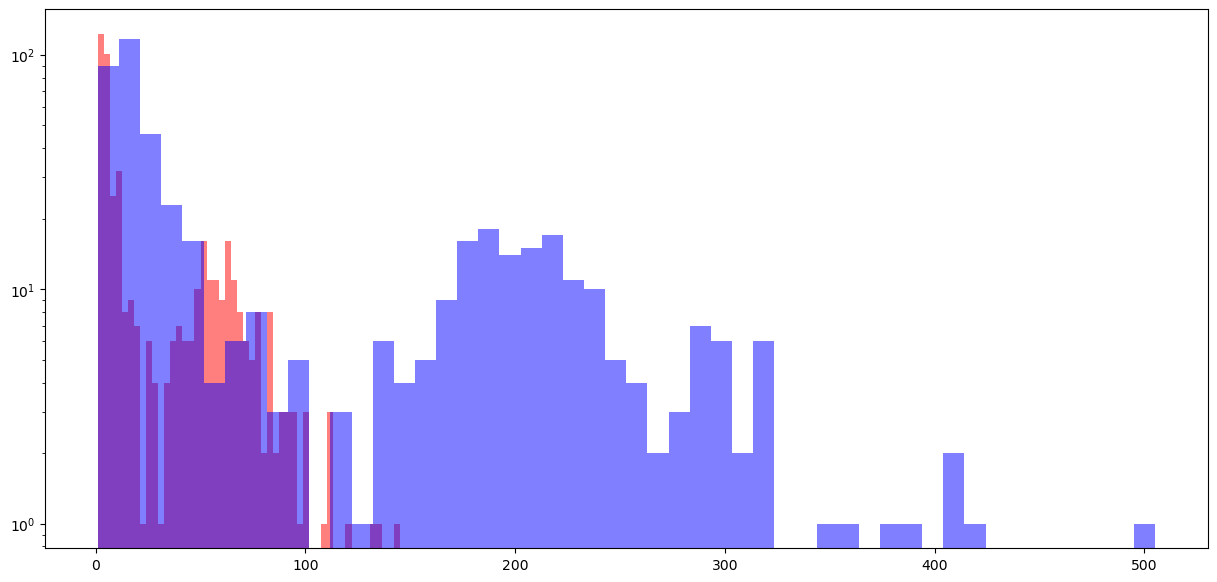

In [112]:
plt.figure(figsize=(15,7))
plt.hist(tk_sp_len, bins=50, alpha=0.5, color='r',label='word')
plt.hist(tk_t_sp_len, bins=50, alpha=0.5, color='b',label='alphabet')
plt.yscale('log')

In [118]:
import re

list_reg = []

for i in df.리뷰내용:
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]', ' ', i).strip()

    # 빈 건 제거
    if text != '':
        list_reg.append(text)

In [119]:
list_reg

['진짜 여지껏 먹어보지 못한 맛이에요 갈비가 진짜 살도 실하고 질기지 않고  부드러워요 냉동상태로 전자렌지에  분 돌리는 동안 생소한 쯔란 시즈닝을 깨 볶듯  분간 볶으면 쯔란 향이 솔솔 나는데 향이 이국적이라 저는 너무 좋더라구요 전자렌지에서 해동된 갈비를  분간 프라이팬 에서 조리하면 고급 갈비 요리가 완성 쯔란은 양이 많아 다 붓지 않고 갈비에 조금씩 솔솔 뿌려먹으면 쯔란이 씹히는 맛과 향이 부드러운 육질의 갈비랑 너무 잘 어울려서 진짜 고급 레스토랑에서 먹는 맛이에요 갈비 양념도 진짜 맛있고 넉넉히 들어 있어서 아이가 맛있다고 밥 비벼먹고 싶다고 해서 밥까지 비벼 먹었어요 진짜 밥도둑이에요 갈비 살도 많이 붙어있어 뜯는 맛이 있어요 저는 강추합니다',
 '오  매장에서 먹은맛이랑 비슷  가끔 시켜먹고 싶은 맛 술안주',
 '쯔란이 잘 어울려요',
 '어머 맛있네요 어제 주문해서 오늘 먹고 오늘 또 주문했어요 ㅋㅋ',
 '조리가 간편해서 좋습니다 저는 맛있는데 아이들은 익숙한 맛이 아니여서 잘 먹지 않아 아쉽네요 호불호가 있는 제품인듯해요 어쨌든 어른인 제 입맛엔 맛있어요',
 '저흰 한번 먹어본걸로 족함',
 '맛있네요 달콤 짭짤한 간장 양념에 쯔런을 뿌리니까 더 맛이 업되네요 재구매 의사 있습니다',
 '남편이 좋아하는 고기',
 '고기는 부드럽고 양념은 진해요 저는 경험해본 것으로 만족합니다',
 '쯔란갈비 기대되요',
 '입맛에 안맞네요 소스가 별루',
 '냄새 하나도 안나고 별미에요',
 '짭짜름 하고 독특해요 간이 아주 잘 되어있어서 밥이랑 먹으면 더 좋을 듯 합니다',
 '후기가 넘 좋아서 구매했어요',
 '아이가 맛있다고 하네요 쯔란향이 집 안 가득해서 향초 키고 난리ㅎ 그러나 비쥬얼 근사했고 맛도 좋았음 재구매의사있음',
 '특이했어요 맛은 있으나 조리를 과하게 하면 양념이 떡진다는 점',
 '첫구매입니다 소스 다넣으니 좀 짜요',
 '생각보다는덜짜요 매장만못하지만 먹을만합니다',
 '맛있어요 아들이 전에먹던 갈비랑은 다르다며 좋아하네요

In [120]:
df['리뷰내용']

0      진짜 여지껏 먹어보지 못한 맛이에요\n갈비가 진짜 살도 실하고 질기지 않고 \n부드...
1                    오  매장에서 먹은맛이랑 비슷 \n가끔 시켜먹고 싶은 맛 술안주
2                                             쯔란이 잘 어울려요
3                    어머 맛있네요 어제 주문해서 오늘 먹고 오늘 또 주문했어요 ㅋㅋ
4      조리가 간편해서 좋습니다 저는 맛있는데 아이들은 익숙한 맛이 아니여서 잘 먹지 않아...
                             ...                        
485    고추기름 땅콩맛 잘 느껴져요\n진짜 맛있어요 ㅎㅎ \n컬리에서 여러개 한 번에 주문...
486                                                  nan
487                                                  nan
488                                                  nan
489                                                  nan
Name: 리뷰내용, Length: 490, dtype: object

In [121]:
tk_sp[0]

['진짜',
 '여지껏',
 '먹어보지',
 '못한',
 '맛이에요',
 '갈비가',
 '진짜',
 '살도',
 '실하고',
 '질기지',
 '않고',
 '부드러워요',
 '냉동상태로',
 '전자렌지에',
 '6분',
 '돌리는',
 '동안',
 '생소한',
 '쯔란',
 '시즈닝을',
 '깨',
 '볶듯',
 '5분간',
 '볶으면',
 '쯔란',
 '향이',
 '솔솔',
 '나는데',
 '향이',
 '이국적이라',
 '저는',
 '너무',
 '좋더라구요',
 '전자렌지에서',
 '해동된',
 '갈비를',
 '3분간',
 '프라이팬',
 '에서',
 '조리하면',
 '고급',
 '갈비',
 '요리가',
 '완성',
 '쯔란은',
 '양이',
 '많아',
 '다',
 '붓지',
 '않고',
 '갈비에',
 '조금씩',
 '솔솔',
 '뿌려먹으면',
 '쯔란이',
 '씹히는',
 '맛과',
 '향이',
 '부드러운',
 '육질의',
 '갈비랑',
 '너무',
 '잘',
 '어울려서',
 '진짜',
 '고급',
 '레스토랑에서',
 '먹는',
 '맛이에요',
 '갈비',
 '양념도',
 '진짜',
 '맛있고',
 '넉넉히',
 '들어',
 '있어서',
 '아이가',
 '맛있다고',
 '밥',
 '비벼먹고',
 '싶다고',
 '해서',
 '밥까지',
 '비벼',
 '먹었어요',
 '진짜',
 '밥도둑이에요',
 '갈비',
 '살도',
 '많이',
 '붙어있어',
 '뜯는',
 '맛이',
 '있어요',
 '저는',
 '강추합니다']

In [127]:
def remove_stopwords(sentence, stopwords):
    words = sentence.split()  # 문장을 단어로 분리
    filtered_words = [word for word in words if word not in stopwords]  # 불용어가 아닌 단어만 선택
    filtered_sentence = ' '.join(filtered_words)  # 단어를 다시 문장으로 결합
    return filtered_sentence

In [133]:
remove_stopwords

<function __main__.remove_stopwords(sentence, stopwords)>

여기서부터 너무 어려워서...